In [60]:
# # https://www.properati.com.ar/data
# ! wget -O ar_properties.csv.gz -q https://storage.googleapis.com/properati-data-public/ar_properties.csv.gz
# ! gzip -d -f /content/ar_properties.csv.gz

In [61]:
import pandas as pd
import numpy as np
import math

import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns


from pprint import pprint

# Lectura de datos

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
# ! gzip -d -f /content/drive/MyDrive/ar_properties.csv.gz

In [64]:
# df = pd.read_csv('/content/drive/MyDrive/ar_properties.csv', index_col="id")  
df = pd.read_csv('/content/drive/MyDrive/inmoblimpio.csv', index_col="id")

In [65]:
df.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
id,,,,,,,,,,,,,,,,,,,,,
hjHZd/BZqSBy3zb+RrqPYg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.638910,-58.476073,Argentina,Capital Federal,Floresta,NaN,...,NaN,372.0,NaN,450000.0,USD,Mensual,Exclente lote !!,"Lote 365 mts 8,90 x 43 mts C3 II.. FOT 3.6 PAR...",Lote,Venta
2KF4gGpEVoyqnMVFBcF7IA==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.562124,-58.464449,Argentina,Capital Federal,Belgrano,NaN,...,NaN,NaN,NaN,20000.0,USD,Mensual,Excelente cochera fija y cubierta en edificio ...,"Muy buena cochera, en el 4to piso en excelente...",Cochera,Venta
BRbo9ohkAnogBN3vgcbh1Q==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.598112,-58.400784,Argentina,Capital Federal,Recoleta,NaN,...,3.0,265.0,265.0,600000.0,USD,Mensual,Oficina comercial · 265m² · 2 Cochera,Gran Oportunidad! Unica piso de oficinas de 26...,Oficina,Venta
twX40kvJoG1MI6LVXnRKpA==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.614123,-58.378985,Argentina,Capital Federal,Monserrat,NaN,...,3.0,150.0,150.0,195000.0,USD,Mensual,Importante Oficina en Micro centro de 150 m2.,Importante Oficina de de 150 m2 con palier pr...,Oficina,Venta
+KGGxikZuWylLGEfAS1QQQ==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.603233,-58.385218,Argentina,Capital Federal,San Nicolás,NaN,...,1.0,NaN,12.0,22000.0,USD,Mensual,Oficina - San Nicolas,VENTA DE OFICINA A METROS DEL PALACIO DE TRIBU...,Oficina,Venta


<h1> Análisis del conjunto de datos
 <h2> Parte 1 PreProcesamiento.

In [66]:
df.shape

(175149, 24)

In [67]:
df.columns

Index(['ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1',
       'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175149 entries, hjHZd/BZqSBy3zb+RrqPYg== to fJLVUIziPl31ACoaE/fj1g==
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ad_type          175149 non-null  object 
 1   start_date       175149 non-null  object 
 2   end_date         175149 non-null  object 
 3   created_on       175149 non-null  object 
 4   lat              165257 non-null  float64
 5   lon              165257 non-null  float64
 6   l1               175149 non-null  object 
 7   l2               175149 non-null  object 
 8   l3               175149 non-null  object 
 9   l4               8615 non-null    object 
 10  l5               0 non-null       float64
 11  l6               0 non-null       float64
 12  rooms            148869 non-null  float64
 13  bedrooms         128525 non-null  float64
 14  bathrooms        153305 non-null  float64
 15  surface_total    117880 non-null  float64
 16  su

Primeras concluciones:

---


 

*   l6 no tiene informacion, se dropea.
*   hay un 10% del database sin lat y long puede evaluarse tirar las filas sin esa info.
*   **Mas importante hay una parte del databse sin precio, eso se tira seguro.**

---
A nivel operativo las fechas hay que pasarlas a formato de fecha. <br />









En mis datos a predecir solo hay USD asique para evitar problemas de cambio de unidades voy a eleminar las que no son en USD.
Tambien es solo de argentina a predecir. <br />
EL objetivo es solo precios por lo que operaciones que no sean de compra tambien se van.<br />
Mis datos son solo de Capital Federal asique voy a filtrar tambien por eso.<br />
Estoy buscando precios de abril del 2022 asique en principio podria ver que precios estan viejos. Mi base de datos es de mayo 2021 asique tendre que hacer ajustes con numeros conocidos de evolución de precios.
<br />
Por ultimo, Se busca datos de barrios especificos asique lo que este por fuera solo añade ruido.

In [69]:
df.currency.value_counts()

USD    175149
Name: currency, dtype: int64

In [70]:
df=df[df.currency=='USD']

In [71]:
df=df[df.l1=='Argentina']

In [72]:
df=df[df.l2=='Capital Federal']

Estos son los barrios que vienen del set de los que quiero predecir.

In [73]:
Barrios_pred=['Balvanera', 'Villa Urquiza', 'Palermo', 'Belgrano', 'Floresta',
       'Villa Pueyrredon', 'Saavedra', 'Villa Devoto', 'San Nicolás',
       'Chacarita', 'Villa Crespo', 'Boedo', 'Flores', 'Paternal', 'Boca',
       'Recoleta', 'Caballito', 'Nuñez', 'Constitución', 'Colegiales',
       'San Telmo', 'Monserrat', 'Puerto Madero', 'Villa del Parque',
       'Almagro', 'Villa Ortuzar', 'Villa Lugano', 'San Cristobal',
       'Barracas', 'Liniers', '2 Ambientes', 'Mataderos',
       'Villa Santa Rita', 'Parque Patricios', 'Parque Chas',
       'Villa General Mitre', 'Retiro', 'Parque Avellaneda',
       'Monte Castro', 'Parque Chacabuco', 'Villa Luro', 'Versalles',
       'Coghlan', 'Vélez Sarsfield', 'Nueva Pompeya', 'Agronomía',
       'Villa Real', 'GBA Norte']

In [74]:
df = df[df['l3'].isin(Barrios_pred)]

In [75]:
# df.to_csv("inmoblimpio.csv")

In [76]:
df['start_date']=pd.to_datetime(df['start_date'])

In [77]:
df['start_date'].max()

Timestamp('2021-06-17 00:00:00')

In [78]:
df['start_date'].min()

Timestamp('2020-05-24 00:00:00')

In [79]:
df['end_date'].replace('9999-12-31','2020-12-31', inplace=True)

In [80]:
df['end_date']=pd.to_datetime(df['end_date'])
df['end_date'].max()

Timestamp('2021-08-16 00:00:00')

In [81]:
df=df[df.start_date>'2021-04-01']

Hago un ajuste preliminar de la columna precios.

In [82]:
df.l3.unique()

array(['Boedo', 'Palermo', 'Mataderos', 'Flores', 'Versalles', 'Nuñez',
       'Almagro', 'Liniers', 'Saavedra', 'Caballito', 'Villa Real',
       'Parque Patricios', 'Coghlan', 'San Nicolás', 'Villa Urquiza',
       'Retiro', 'Floresta', 'Colegiales', 'Belgrano', 'Recoleta',
       'Balvanera', 'San Telmo', 'Villa Crespo', 'Villa Devoto',
       'Villa Lugano', 'San Cristobal', 'Villa Ortuzar', 'Boca',
       'Monserrat', 'Villa Luro', 'Monte Castro', 'Villa del Parque',
       'Barracas', 'Chacarita', 'Constitución', 'Puerto Madero',
       'Villa General Mitre', 'Paternal', 'Agronomía', 'Parque Chacabuco',
       'Parque Avellaneda', 'Parque Chas', 'Villa Santa Rita'],
      dtype=object)

##Ajuste por evolución de precios

In [83]:
df.loc[df.l3 == 'Palermo', ['price']]=df.price*0.9
df.loc[df.l3 ==  'Belgrano',['price']]=df.price*0.95
df.loc[df.l3 == 'Recoleta', ['price']]=df.price*0.87
df.loc[df.l3 ==  'Caballito',['price']]=df.price*0.93
df.loc[df.l3 == 'Villa Urquiza', ['price']]=df.price*0.9
df.loc[df.l3 ==  'Almagro',['price']]=df.price*0.922
df.loc[df.l3 == 'Villa Crespo', ['price']]=df.price*0.824
df.loc[df.l3 ==  'Nuñez',['price']]=df.price*0.946

df.loc[df.l3 == 'Flores', ['price']]=df.price*0.94
df.loc[df.l3 ==  'Balvanera',['price']]=df.price*0.95
df.loc[df.l3 == 'Puerto Madero', ['price']]=df.price*0.96
df.loc[df.l3 ==  'Colegiales',['price']]=df.price*0.91
df.loc[df.l3 == 'Saavedra', ['price']]=df.price*0.9
df.loc[df.l3 ==  'Villa Devoto',['price']]=df.price*0.922
df.loc[df.l3 == 'Floresta', ['price']]=df.price*0.904
df.loc[df.l3 ==  'Villa Del Parque',['price']]=df.price*0.894

df.loc[df.l3 == 'Retiro', ['price']]=df.price*0.881
df.loc[df.l3 ==  'Barracas',['price']]=df.price*1.08
df.loc[df.l3 == 'San Cristobal', ['price']]=df.price*0.811
df.loc[df.l3 ==  'San Telmo',['price']]=df.price*0.971
df.loc[df.l3 == 'Boedo', ['price']]=df.price*0.898
df.loc[df.l3 ==  'San Nicolas',['price']]=df.price*0.923
df.loc[df.l3 == 'Mataderos', ['price']]=df.price*0.806
df.loc[df.l3 ==  'Liniers',['price']]=df.price*0.854

df.loc[df.l3 == 'Parque Chacabuco', ['price']]=df.price*0.885
df.loc[df.l3 ==  'Coghlan',['price']]=df.price*1.015
df.loc[df.l3 == 'Monserrat', ['price']]=df.price*0.951
df.loc[df.l3 ==  'Villa Luro',['price']]=df.price*0.867
df.loc[df.l3 == 'Parque Patricios', ['price']]=df.price*0.982
df.loc[df.l3 ==  'Chacarita',['price']]=df.price*0.845
df.loc[df.l3 == 'Villa Ortuzar', ['price']]=df.price*0.89
df.loc[df.l3 ==  'Monte Castro',['price']]=df.price*0.959

df.loc[df.l3 == 'Constitucion', ['price']]=df.price*0.851
df.loc[df.l3 ==  'Paternal',['price']]=df.price*0.907
df.loc[df.l3 == 'Villa General Mitre', ['price']]=df.price*1.088
df.loc[df.l3 ==  'Boca',['price']]=df.price*0.98
df.loc[df.l3 == 'Parque Avellaneda', ['price']]=df.price*0.862
df.loc[df.l3 ==  'Villa Santa Rita',['price']]=df.price*1.04
df.loc[df.l3 == 'Parque Chas', ['price']]=df.price*0.989
df.loc[df.l3 ==  'Versalles',['price']]=df.price*0.936


df.loc[df.l3 == 'Agronomia', ['price']]=df.price*0.815
df.loc[df.l3 ==  'Villa Real',['price']]=df.price*0.851





/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [84]:
df.currency.value_counts()

USD    40562
Name: currency, dtype: int64

In [85]:
df=df.drop('l6', axis=1)

In [86]:
df['price_period'].value_counts()

Mensual    25061
Name: price_period, dtype: int64

In [87]:
df.ad_type.value_counts()

Propiedad    40562
Name: ad_type, dtype: int64

Puedo tirar tambien el price period y ad type.

In [88]:
df.isnull().sum()

ad_type                0
start_date             0
end_date               0
created_on             0
lat                 1461
lon                 1461
l1                     0
l2                     0
l3                     0
l4                 39202
l5                 40562
rooms               5517
bedrooms            8510
bathrooms           4851
surface_total      20344
surface_covered    19974
price                  0
currency               0
price_period       15501
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [89]:
df.dropna(subset=['price','lat','lon','l3','title','description','operation_type','surface_total','surface_covered'], inplace=True)

In [90]:
df.isnull().sum()

ad_type                0
start_date             0
end_date               0
created_on             0
lat                    0
lon                    0
l1                     0
l2                     0
l3                     0
l4                 17796
l5                 18625
rooms               1585
bedrooms            3633
bathrooms            967
surface_total          0
surface_covered        0
price                  0
currency               0
price_period        7517
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [91]:
df.shape

(18625, 23)

In [92]:
df=df.drop('price_period', axis=1)

In [93]:
df=df.drop('ad_type', axis=1)

In [94]:
df.operation_type.unique()

array(['Venta', 'Alquiler', 'Alquiler temporal'], dtype=object)

In [95]:
df=df[df.operation_type=='Venta']

In [96]:
df.shape

(17493, 21)

<h1> Análisis del conjunto de datos
 <h2> Parte 2 Analisis de datos y creación de features.
 Aca empiezo a hacer cambios en los datos, podria ya sumar lo que voy a predecir asi los concateno y despues los separo.

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17493 entries, H2Dos+6eAwi02yiKp8oTAw== to 5LVooBaMXXxTkv2kEmBCXQ==
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   start_date       17493 non-null  datetime64[ns]
 1   end_date         17493 non-null  datetime64[ns]
 2   created_on       17493 non-null  object        
 3   lat              17493 non-null  float64       
 4   lon              17493 non-null  float64       
 5   l1               17493 non-null  object        
 6   l2               17493 non-null  object        
 7   l3               17493 non-null  object        
 8   l4               693 non-null    object        
 9   l5               0 non-null      float64       
 10  rooms            16145 non-null  float64       
 11  bedrooms         14143 non-null  float64       
 12  bathrooms        16548 non-null  float64       
 13  surface_total    17493 non-null  float64       
 14  s

##LAT y LON

In [98]:


df['rot_45_x'] = (0.707 * df['lat']) + (0.707 * df['lon'])
df['rot_45_y'] = (0.707 * df['lon']) + (0.707 * df['lat'])
df['rot_30_x'] = (0.866 * df['lat']) + (0.5 * df['lon'])
df['rot_30_y'] = (0.866 * df['lon']) + (0.5 * df['lat'])




##Atributos temporales

In [99]:
df['start_date']=pd.to_datetime(df['start_date'])
df['anio_s']=pd.DatetimeIndex(df['start_date']).year
df['mes_s']=pd.DatetimeIndex(df['start_date']).month
df['end_date']=pd.to_datetime(df['end_date'])
df['anio_e']=pd.DatetimeIndex(df['end_date']).year
df['mes_e']=pd.DatetimeIndex(df['end_date']).month
df['created_on']=pd.to_datetime(df['created_on'])
df['anio_c']=pd.DatetimeIndex(df['created_on']).year
df['mes_c']=pd.DatetimeIndex(df['created_on']).month

##Atributos De espacios

In [100]:
df['logr']=np.log(df.rooms+1)

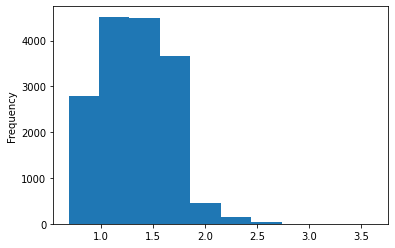

In [101]:
df.logr.plot.hist()

In [102]:
df.bedrooms.value_counts()

1.0     5449
2.0     4621
3.0     2966
4.0      800
5.0      170
6.0       49
7.0       22
8.0       18
9.0        8
10.0       8
12.0       7
15.0       4
20.0       3
24.0       2
30.0       2
14.0       2
82.0       1
27.0       1
34.0       1
64.0       1
11.0       1
32.0       1
17.0       1
23.0       1
36.0       1
16.0       1
43.0       1
13.0       1
Name: bedrooms, dtype: int64

In [103]:
# df.bedrooms = np.where(df.bedrooms < 1, 0.1, df.bedrooms)
df=df[df.bedrooms>=0]

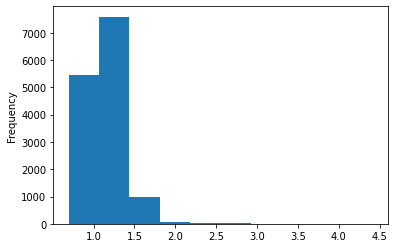

In [104]:
np.log(df.bedrooms+1).plot.hist()

In [105]:
df['logbed']=np.log(df.bedrooms+1)

In [106]:
# np.log(df.bathrooms).plot.hist()

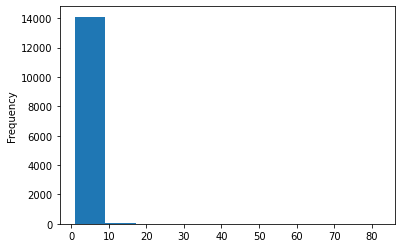

In [107]:
df.bedrooms.plot.hist()

In [108]:
df['logbath']=np.log(df.bathrooms+1)

In [109]:
df.shape

(14143, 34)

##Analisis de Superficie

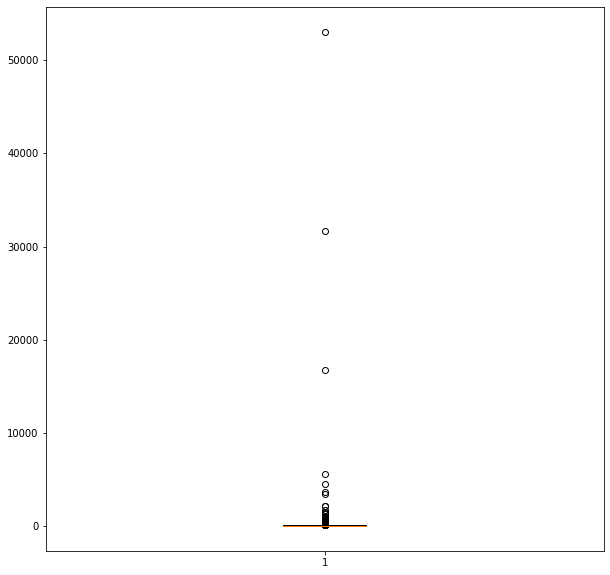

In [110]:
fig = plt.figure(figsize =(10, 10))
plt.boxplot(df.surface_covered);

El maximo en mi prediccion es 600

In [111]:
df.shape

(14143, 34)

In [112]:
df=df[df.surface_covered<600]

In [113]:
df.shape

(14099, 34)

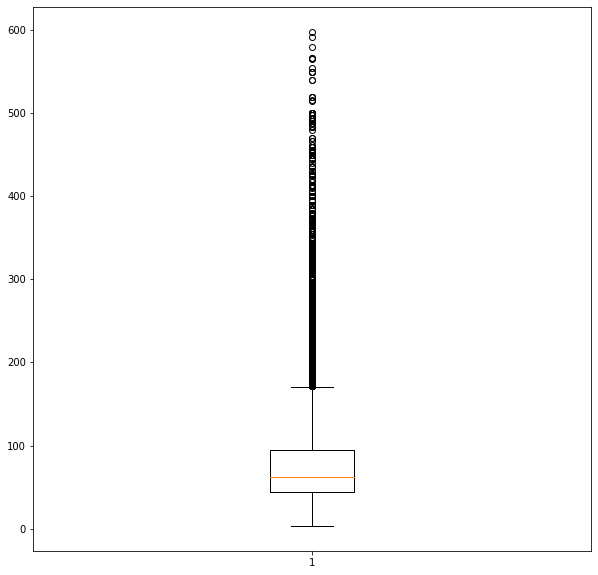

In [114]:
fig = plt.figure(figsize =(10, 10))
plt.boxplot(df.surface_covered);

Limpio algunos outliers de superficie cubierta.

In [115]:
df.shape

(14099, 34)

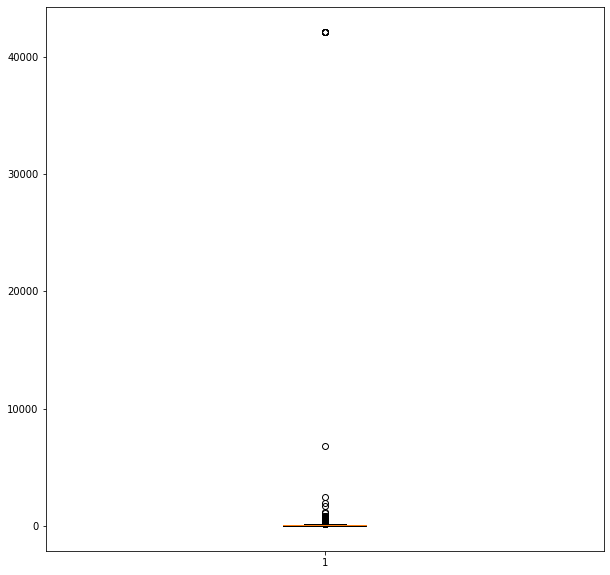

In [116]:
fig = plt.figure(figsize =(10, 10))
plt.boxplot(df.surface_total);

In [117]:
df=df[df.surface_total<600]

In [118]:
df.shape

(14058, 34)

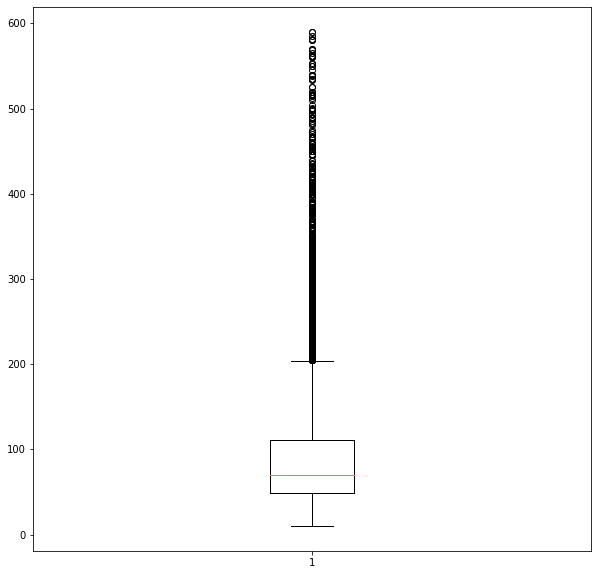

In [119]:
fig = plt.figure(figsize =(10, 10))
plt.boxplot(df.surface_total);

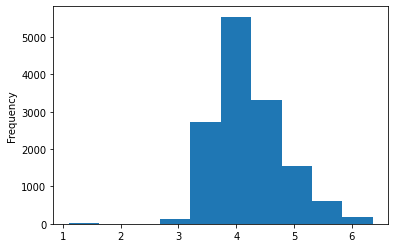

In [120]:
np.log(df.surface_covered).plot.hist()

In [121]:
df['logsupcov']=np.log(df.surface_covered+1)

In [122]:
df.shape

(14058, 35)

In [123]:
# df=df[df.surface_covered<df.surface_covered.quantile(.9999)]
# df.surface_covered.plot.hist()

# df.shape (405996, 24) de original (834056, 24)


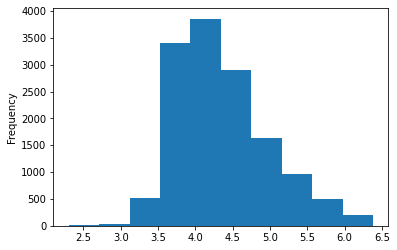

In [124]:
np.log(df.surface_total).plot.hist()

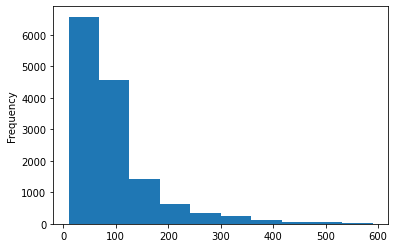

In [125]:
df.surface_total.plot.hist()

In [126]:
df['logsuptot']=np.log(df.surface_total+1)

##Observacion de los ln

In [127]:
df.l2.unique()

array(['Capital Federal'], dtype=object)

In [128]:
df.l1.unique()

array(['Argentina'], dtype=object)

In [129]:
df.l3.value_counts()

Palermo                2194
Belgrano               1434
Caballito              1241
Recoleta               1049
Villa Urquiza           629
Almagro                 575
Nuñez                   528
Flores                  511
Villa Crespo            464
Balvanera               412
Colegiales              332
Villa Devoto            313
Villa del Parque        310
Saavedra                299
Puerto Madero           247
Retiro                  240
San Nicolás             225
San Cristobal           213
Barracas                212
Boedo                   205
San Telmo               204
Coghlan                 196
Floresta                188
Parque Chacabuco        166
Monserrat               139
Villa Luro              139
Mataderos               124
Parque Patricios        123
Villa Ortuzar           119
Chacarita               107
Villa Lugano            106
Liniers                 100
Villa General Mitre      92
Monte Castro             86
Parque Chas              79
Villa Santa Rita    

In [130]:
df.property_type.unique()

array(['PH', 'Departamento', 'Lote', 'Local comercial', 'Casa', 'Oficina',
       'Otro', 'Depósito', 'Casa de campo'], dtype=object)

##Palabras clave

In [131]:
df["Nuevo"] = df["description"].str.lower().str.contains("excel")

df["1am"] = df["description"].str.lower().str.contains("1 ambiente") | df["description"].str.lower().str.contains("Ambientes 1")
df["2am"] = df["description"].str.lower().str.contains("2 ambientes") | df["description"].str.lower().str.contains("Ambientes 2")
df["3am"] = df["description"].str.lower().str.contains("3 ambientes") | df["description"].str.lower().str.contains("Ambientes 3")
df["4am"] = df["description"].str.lower().str.contains("4 ambientes") | df["description"].str.lower().str.contains("Ambientes 4")
df["5am"] = df["description"].str.lower().str.contains("5 ambientes") | df["description"].str.lower().str.contains("Ambientes 5")

df["Patio"] = df["description"].str.lower().str.contains("patio")
df["Balcon"] = df["description"].str.lower().str.contains("balcon")
df["Pileta"] = df["description"].str.lower().str.contains("pileta")
df["Reciclado"] = df["description"].str.lower().str.contains("reciclado")

df["cocina"] = df["description"].str.lower().str.contains("cocina")
df["escri"] = df["description"].str.lower().str.contains("escritorio")
df["apto"] = df["description"].str.lower().str.contains("apto profesional")
df["laundry"] = df["description"].str.lower().str.contains("laundry")
df["parri"] = df["description"].str.lower().str.contains("parrilla")

df["mascotas"] = df["description"].str.lower().str.contains("mascotas")
df["Aire Acondicionado"] = df["description"].str.lower().str.contains("aire acondicionado")
df["famroom"] = df["description"].str.lower().str.contains("family room")
df["gym"] = df["description"].str.lower().str.contains("gimnasio") | df["description"].str.lower().str.contains("gym")
df["SUM"] = df["description"].str.lower().str.contains("SUM")

df["Seguridad"] = df["description"].str.lower().str.contains("seguridad")
df["Alarma"] = df["description"].str.lower().str.contains("alarma")
df["calefa"] = df["description"].str.lower().str.contains("calefación") 
df["parri"] = df["description"].str.lower().str.contains("parrilla")


df["Gas"] = df["description"].str.lower().str.contains("gas")
df["Luz"] = df["description"].str.lower().str.contains("luz")


In [132]:
df.Nuevo.value_counts()

False    7209
True     6849
Name: Nuevo, dtype: int64

In [133]:
df['1am'].value_counts()

False    13889
True       169
Name: 1am, dtype: int64

In [134]:
df['2am'].value_counts()

False    11212
True      2846
Name: 2am, dtype: int64

In [135]:
df['3am'].value_counts()

False    10952
True      3106
Name: 3am, dtype: int64

In [136]:
df['4am'].value_counts()

False    12484
True      1574
Name: 4am, dtype: int64

In [137]:
df['Patio'].value_counts()

False    11524
True      2534
Name: Patio, dtype: int64

In [138]:
df['Balcon'].value_counts()

False    11423
True      2635
Name: Balcon, dtype: int64

In [139]:
df['Pileta'].value_counts()

False    12093
True      1965
Name: Pileta, dtype: int64

In [140]:
df['Reciclado'].value_counts()

False    12683
True      1375
Name: Reciclado, dtype: int64

##Algunas cuentitas:

In [141]:
df['r/sup']=df['rooms']/df['surface_covered']

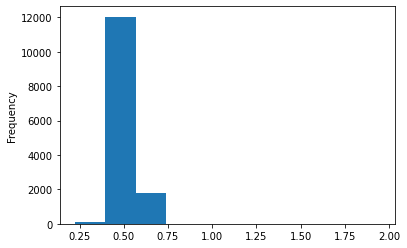

In [142]:
np.log((df.bedrooms/df.rooms)+1).plot.hist()

# Tratamiento de los datos

In [143]:
df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'l4', 'l5', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'currency', 'title', 'description',
       'property_type', 'operation_type', 'rot_45_x', 'rot_45_y', 'rot_30_x',
       'rot_30_y', 'anio_s', 'mes_s', 'anio_e', 'mes_e', 'anio_c', 'mes_c',
       'logr', 'logbed', 'logbath', 'logsupcov', 'logsuptot', 'Nuevo', '1am',
       '2am', '3am', '4am', '5am', 'Patio', 'Balcon', 'Pileta', 'Reciclado',
       'cocina', 'escri', 'apto', 'laundry', 'parri', 'mascotas',
       'Aire Acondicionado', 'famroom', 'gym', 'SUM', 'Seguridad', 'Alarma',
       'calefa', 'Gas', 'Luz', 'r/sup'],
      dtype='object')

Se modifica el precio usando log para aplanar.

In [144]:
df.price=np.log(df.price)

# Modelización

In [145]:
from sklearn.model_selection import train_test_split
# Separate target from predictors
numerical_cols=['rooms', 'bedrooms', 'bathrooms','r/sup']
numerical_cols2=['logsuptot', 'logsupcov']
numerical_cols3=['rot_45_x', 'rot_45_y', 'rot_30_x',
       'rot_30_y']
categorical_cols=['l3','property_type','Nuevo', '1am',
       '2am', '3am', '4am', '5am', 'Patio', 'Balcon', 'Pileta', 'Reciclado',
       'cocina', 'escri', 'apto', 'laundry', 'parri', 'mascotas',
       'Aire Acondicionado', 'famroom', 'gym', 'SUM', 'Seguridad', 'Alarma',
       'calefa', 'Gas', 'Luz']
my_cols = categorical_cols + numerical_cols + numerical_cols2 + numerical_cols3
y = df.price
X = df[my_cols]
# X = df.drop(['price'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=42)


                                                                

X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [146]:
def log_transform(x):
    return np.log(x + 1)

In [147]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler


# Preprocessing for numerical data
scaler = StandardScaler()
scaler2 = RobustScaler()
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.



transformer = FunctionTransformer(log_transform)
numerical_transformer = Pipeline(steps=[('numimputer', SimpleImputer(strategy='mean')),
                                        ('scaler', scaler)])
# Preprocessing for numerical data 2
numerical_transformer2 = Pipeline(steps=[('numimputer2', SimpleImputer(strategy='mean'))]
                                        )

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
         ('num2', numerical_transformer2, numerical_cols2),
        #  ('num3', numerical_transformer3, numerical_cols3),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [148]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200,max_depth=15, random_state=42, n_jobs=-1)


In [149]:
df.shape

(14058, 62)

In [150]:

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# # Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# # Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = sk.model_selection.cross_val_score(my_pipeline, X_train, y=y_train, cv=4, scoring='neg_root_mean_squared_error',error_score='raise')
# score = mean_absolute_error(y_valid, preds)

print('Score:', score)

Score: [-0.23754743 -0.24795723 -0.24564661 -0.24811277]


In [151]:
y2=np.exp(preds)

In [152]:
from sklearn.metrics import mean_absolute_error
score2 = mean_absolute_error(np.exp(y_valid),np.exp(preds))
print('Score2:', score2)

Score2: 41354.742583676656


In [153]:
#Esto es el R^2
score3 = my_pipeline.score(X_train,y_train)
print('Score3:', score3)

Score3: 0.953992543485163


In [154]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(np.exp(y_valid),np.exp(preds))

score4 = -math.sqrt(mse)
print('Score4:', score4)

Score4: -95380.1530393942


In [155]:
np.exp(y_valid.head(20))

id
4BrOVwsV/yoFhvp/T3LJ4Q==    1980000.0
y0zk9jQECTig9hGxnAKLBQ==     234000.0
S5eUp4QkKCUBsI8fKh1mxg==     235600.0
J/ORJfJ9feuiG9/S2NYt1A==     390630.0
OD9F2BgfzVxQHXWXZJe9Bg==     199230.0
TESs1koxkWfe+2D3Vj1Gug==     193820.0
AkVEoqPkVm9T9WDONtAkuw==      46145.9
0PcHCOctnUGMfcBTr5ipHQ==     126000.0
95S2XjF+IpQNj1SCefRCgw==     112500.0
Ksg6FD76MIM9KeTS3oBbPg==     405000.0
n1OKGqWZSk0vI0bLTZvEWQ==     209250.0
ikCP3UpzfeRTciBOdiDiNg==     118016.0
oW8ZAGG8iZVxGu+p+gFupA==     243600.0
MXPB6HARV6YO7bxbV4RK4A==     112500.0
nFxCJL7NxnMb+NI7vtRZpg==     207000.0
wOe1KzEl1FMuuFr92P9Hlw==     115360.0
jUo9Py8C/WLdfefuIBe7uA==     225000.0
feF0LgVY6RQJv4+wSjqQvw==      80910.0
bCtzUjKy5uQLBmoGxtelMg==      50000.0
DO2Xt22n1V1pVYMeMieumw==     213900.0
Name: price, dtype: float64

In [156]:
pred=pd.DataFrame(np.exp(preds), index=y_valid.index)
pred.head(20)

,0
id,
4BrOVwsV/yoFhvp/T3LJ4Q==,1.957261e+06
y0zk9jQECTig9hGxnAKLBQ==,2.712201e+05
S5eUp4QkKCUBsI8fKh1mxg==,1.863806e+05
J/ORJfJ9feuiG9/S2NYt1A==,3.291811e+05
OD9F2BgfzVxQHXWXZJe9Bg==,1.856269e+05
TESs1koxkWfe+2D3Vj1Gug==,2.635926e+05
AkVEoqPkVm9T9WDONtAkuw==,4.658398e+04
0PcHCOctnUGMfcBTr5ipHQ==,1.232080e+05
95S2XjF+IpQNj1SCefRCgw==,1.160215e+05


In [157]:
corr_matrix = df.corr()

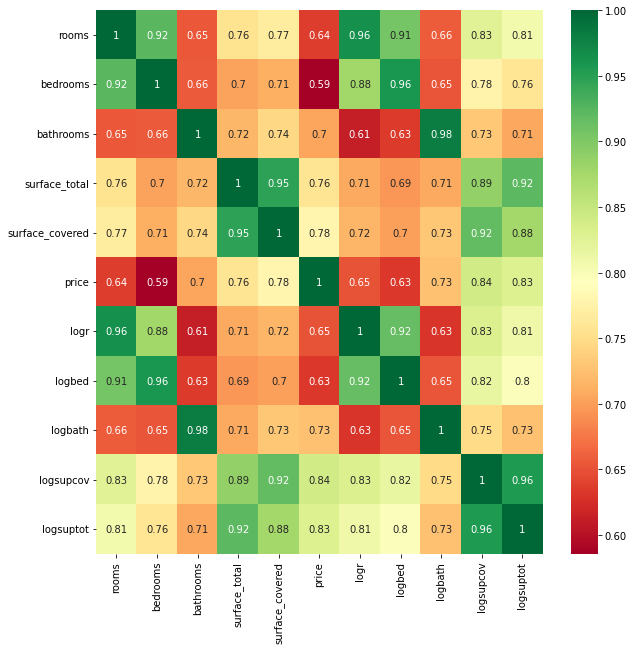

In [158]:
corr = df.corr()
highly_corr_features = corr.index[abs(corr["price"])>0.5]
plt.figure(figsize=(10,10))
map = sns.heatmap(df[highly_corr_features].corr(),annot=True,cmap="RdYlGn")

In [159]:
corr_matrix['price'].sort_values(ascending=False)

price                 1.000000
logsupcov             0.841313
logsuptot             0.828977
surface_covered       0.779790
surface_total         0.757929
logbath               0.725404
bathrooms             0.703770
logr                  0.651626
rooms                 0.635777
logbed                0.633931
bedrooms              0.585583
rot_30_x              0.285221
Seguridad             0.276646
gym                   0.272681
lat                   0.267957
escri                 0.265858
rot_45_y              0.247393
rot_45_x              0.247393
Pileta                0.204051
rot_30_y              0.198196
parri                 0.179388
4am                   0.169847
5am                   0.136573
famroom               0.100732
lon                   0.093831
Alarma                0.069106
laundry               0.050591
Balcon                0.050400
Reciclado             0.042678
cocina                0.038896
anio_e                0.031669
Patio                 0.018928
Nuevo   

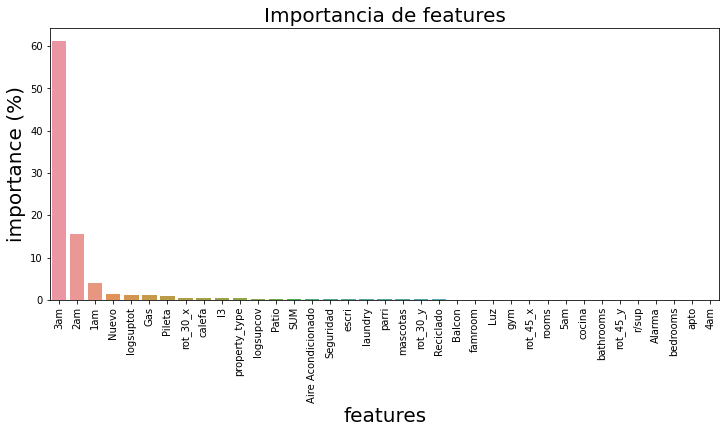

In [160]:
# columnas_2=df.columns.drop('price')
columnas_2=X.columns
columnas_2
diccionario = pd.DataFrame(list(zip(columnas_2,my_pipeline.steps[1][1].feature_importances_*100)), columns = ['features','importance (%)']);
primeros = diccionario.nlargest(40,columns=['importance (%)']);

plt.figure(figsize=(12,5))
sns.barplot(x = "features", y = "importance (%)",data = primeros)
plt.xticks(rotation = 90,fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Importancia de features', fontsize=20)
plt.xlabel('features', fontsize=20)
plt.ylabel('importance (%)', fontsize=20)
plt.show()

## Predicción para Kaggle


In [161]:
df_pred = pd.read_csv('/content/drive/MyDrive/a_predecir.csv', index_col="id")
df_pred.fillna(0, inplace=True)

In [162]:

df_pred['rot_45_x'] = (0.707 * df_pred['lat']) + (0.707 * df_pred['lon'])
df_pred['rot_45_y'] = (0.707 * df_pred['lon']) + (0.707 * df_pred['lat'])
df_pred['rot_30_x'] = (0.866 * df_pred['lat']) + (0.5 * df_pred['lon'])
df_pred['rot_30_y'] = (0.866 * df_pred['lon']) + (0.5 * df_pred['lat'])



df_pred['start_date']=pd.to_datetime(df_pred['start_date'])
df_pred['anio_s']=pd.DatetimeIndex(df_pred['start_date']).year
df_pred['mes_s']=pd.DatetimeIndex(df_pred['start_date']).month
df_pred['end_date']=pd.to_datetime(df_pred['end_date'])
df_pred['anio_e']=pd.DatetimeIndex(df_pred['end_date']).year
df_pred['mes_e']=pd.DatetimeIndex(df_pred['end_date']).month
df_pred['created_on']=pd.to_datetime(df_pred['created_on'])
df_pred['anio_c']=pd.DatetimeIndex(df_pred['created_on']).year
df_pred['mes_c']=pd.DatetimeIndex(df_pred['created_on']).month


#Estos +1 son por si aparecen 0
df_pred['logr']=np.log(df_pred.rooms+1)
df_pred['logbed']=np.log(df_pred.bedrooms+1)
df_pred['logbath']=np.log(df_pred.bathrooms+1)
df_pred['logsupcov']=np.log(df_pred.surface_covered+1)
df_pred['logsuptot']=np.log(df_pred.surface_total+1)


df_pred["Nuevo"] = df_pred["description"].str.lower().str.contains("excel")
df_pred["1am"] = df_pred["description"].str.lower().str.contains("1 ambiente") | df_pred["details"].str.lower().str.contains("ambientes 1")
df_pred["2am"] = df_pred["description"].str.lower().str.contains("2 ambiente") | df_pred["details"].str.lower().str.contains("ambientes 2")
df_pred["3am"] = df_pred["description"].str.lower().str.contains("3 ambiente") | df_pred["details"].str.lower().str.contains("ambientes 3")
df_pred["4am"] = df_pred["description"].str.lower().str.contains("4 ambiente") | df_pred["details"].str.lower().str.contains("ambientes 4")
df_pred["5am"] = df_pred["description"].str.lower().str.contains("5 ambiente") | df_pred["details"].str.lower().str.contains("ambientes 5")
df_pred["Patio"] = df_pred["description"].str.lower().str.contains("patio") | df_pred["details"].str.lower().str.contains("patio")
df_pred["Balcon"] = df_pred["description"].str.lower().str.contains("balcon") | df_pred["details"].str.lower().str.contains("balcon")
df_pred["Pileta"] = df_pred["description"].str.lower().str.contains("pileta") | df_pred["details"].str.lower().str.contains("pileta")
df_pred["Reciclado"] = df_pred["description"].str.lower().str.contains("reciclado")
df_pred["cocina"] = df_pred["description"].str.lower().str.contains("cocina") | df_pred["details"].str.lower().str.contains("cocina")
df_pred["escri"] = df_pred["description"].str.lower().str.contains("escritorio") | df_pred["details"].str.lower().str.contains("escritorio")
df_pred["apto"] = df_pred["description"].str.lower().str.contains("apto profesional") 
df_pred["laundry"] = df_pred["description"].str.lower().str.contains("laundry") 
df_pred["parri"] = df_pred["description"].str.lower().str.contains("parrilla")  | df_pred["details"].str.lower().str.contains("parrilla")
df_pred["mascotas"] = df_pred["description"].str.lower().str.contains("mascotas") | df_pred["details"].str.lower().str.contains("mascotas")
df_pred["Aire Acondicionado"] = df_pred["description"].str.lower().str.contains("aire acondicionado")  | df_pred["details"].str.lower().str.contains("aire acondicionado")
df_pred["famroom"] = df_pred["description"].str.lower().str.contains("family room")| df_pred["details"].str.lower().str.contains("family room")
df_pred["gym"] = df_pred["description"].str.lower().str.contains("gimnasio") | df_pred["description"].str.lower().str.contains("gym") | df_pred["details"].str.lower().str.contains("gimnasio")
df_pred["SUM"] = df_pred["description"].str.lower().str.contains("SUM") | df_pred["details"].str.lower().str.contains("SUM")
df_pred["Seguridad"] = df_pred["description"].str.lower().str.contains("seguridad") | df_pred["details"].str.lower().str.contains("Seguridad")
df_pred["Alarma"] = df_pred["description"].str.lower().str.contains("alarma") | df_pred["details"].str.lower().str.contains("alarma")
df_pred["calefa"] = df_pred["description"].str.lower().str.contains("calefación")  | df_pred["details"].str.lower().str.contains("calefación")
df_pred["Gas"] = df_pred["description"].str.lower().str.contains("gas")  | df_pred["services"].str.lower().str.contains("gas")
df_pred["Luz"] = df_pred["description"].str.lower().str.contains("luz")  | df_pred["services"].str.lower().str.contains("gas")




df["Gas"] = df["description"].str.lower().str.contains("gas")
df["Luz"] = df["description"].str.lower().str.contains("luz")


df_pred['r/sup']=df_pred['rooms']/df_pred['surface_covered']

In [163]:
df_pred['1am'].value_counts()

False    887
True     200
Name: 1am, dtype: int64

In [164]:
df_pred.l3.unique()

array(['Balvanera', 'Villa Urquiza', 'Palermo', 'Belgrano', 'Floresta',
       'Villa Pueyrredon', 'Saavedra', 'Villa Devoto', 'San Nicolás',
       'Chacarita', 'Villa Crespo', 'Boedo', 'Flores', 'Paternal', 'Boca',
       'Recoleta', 'Caballito', 'Nuñez', 'Constitución', 'Colegiales',
       'San Telmo', 'Monserrat', 'Puerto Madero', 'Villa del Parque',
       'Almagro', 'Villa Ortuzar', 'Villa Lugano', 'San Cristobal',
       'Barracas', 'Liniers', '2 Ambientes', 'Mataderos',
       'Villa Santa Rita', 'Parque Patricios', 'Parque Chas',
       'Villa General Mitre', 'Retiro', 'Parque Avellaneda',
       'Monte Castro', 'Parque Chacabuco', 'Villa Luro', 'Versalles',
       'Coghlan', 'Vélez Sarsfield', 'Nueva Pompeya', 'Agronomía',
       'Villa Real', 'GBA Norte'], dtype=object)

In [165]:
# quedate con las mismas columnas que ar_properties
X_pred = df_pred[X.columns]

In [166]:
from sklearn import set_config
set_config(display='diagram')
my_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['rooms', 'bedrooms',
                                                   'bathrooms', 'r/sup']),
                                                 ('num2',
                                                  Pipeline(steps=[('numimputer2',
                                                                   SimpleImputer())]),
                                                  ['logsuptot', 'logsupcov']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['l3', 'property_type',
                                                   'Nuevo', '1am', '2am', '3am',
                                                   '4am', '5am', 'Patio',
                                                   'Balcon', 'Pileta',
                                                   'Reciclado', 'cocina',
                                                   'escri', 'apto', 'laundry',
                                                   'parri', 'mascotas',
                                                   'Aire Acondicionado',
                                                   'famroom', 'gym', 'SUM',
                                                   'Seguridad', 'Alarma',
                                                   'calefa', 'Gas', 'Luz'])])),
                ('model',
                 RandomForestRegressor(max_depth=15, n_estimators=200,
                                       n_jobs=-1, random_state=42))])

In [167]:
# los mejores hiperparámetros encontrados antes
n_estimators = 350
max_depth = 15

# entrenamiento
# reg = sk.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42, n_jobs=-1)
my_pipeline.fit(X, y)

# predicción
df_pred["price"] = my_pipeline.predict(X_pred)

In [168]:
# grabo la solución Despues de convertirla
df_pred["price"]=np.exp(df_pred["price"])
df_pred[["price"]].to_csv("solucion.csv")